# Simulator Demo

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook
import random
import math

import phyre

In [3]:
# Choosing a setup where only one ball is needed
eval_setup = 'ball_cross_template'

# Getting just one fold of scenarios from the simulator
fold_id = 0

# Getting the tasks split into training, validation, and test
train_tasks, dev_tasks, test_tasks = phyre.get_fold(eval_setup, fold_id)
print('Size of resulting splits:\n train:', len(train_tasks), '\n dev:',
      len(dev_tasks), '\n test:', len(test_tasks))

Size of resulting splits:
 train: 1600 
 dev: 400 
 test: 500


In [4]:
# Getting action tier for our tasks - a single ball
action_tier = phyre.eval_setup_to_action_tier(eval_setup)
print('Action tier for', eval_setup, 'is', action_tier)

Action tier for ball_cross_template is ball


In [104]:
# Let's set our tasks to first 50 of the dev set 
tasks = dev_tasks[:50]
print(tasks)

# Create the simulator from the tasks and tier.
simulator = phyre.initialize_simulator(tasks, action_tier)

('00000:000', '00000:001', '00000:002', '00000:003', '00000:004', '00000:005', '00000:006', '00000:007', '00000:008', '00000:009', '00000:010', '00000:011', '00000:012', '00000:013', '00000:014', '00000:015', '00000:016', '00000:017', '00000:018', '00000:019', '00000:020', '00000:021', '00000:022', '00000:023', '00000:024', '00000:025', '00000:026', '00000:027', '00000:028', '00000:029', '00000:030', '00000:031', '00000:032', '00000:033', '00000:034', '00000:035', '00000:036', '00000:037', '00000:038', '00000:039', '00000:040', '00000:041', '00000:042', '00000:043', '00000:044', '00000:045', '00000:046', '00000:047', '00000:048', '00000:049')


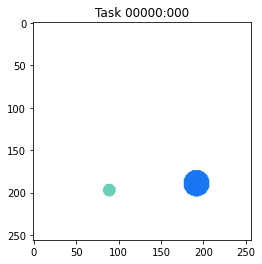

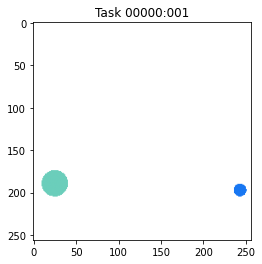

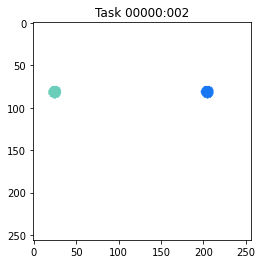

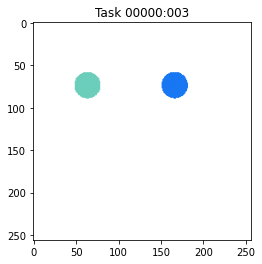

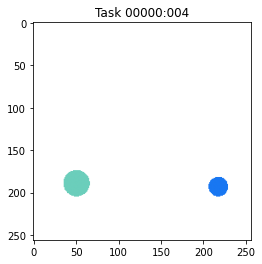

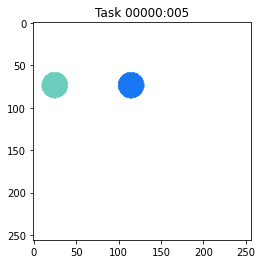

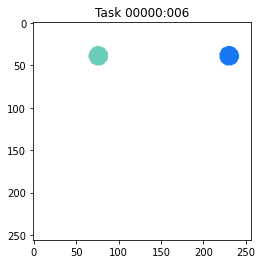

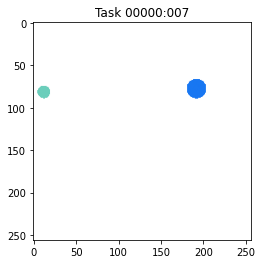

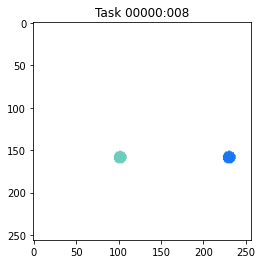

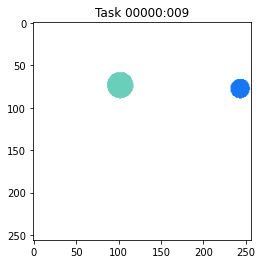

In [8]:
# Showing initial stages of the first 10 scenes
for task_index in range(min(10, len(tasks))):
    initial_scene = simulator.initial_scenes[task_index]
    plt.imshow(phyre.observations_to_float_rgb(initial_scene))
    plt.title(f'Task {simulator.task_ids[task_index]}');
    plt.show()

In [40]:
# getting a 100 actions from a simulator
# it uniformly samples actions skipping invalid ones
# Action dimensions: 3 (x, y, radius)

actions = simulator.build_discrete_action_space(max_actions=100)

# Let's simulate for the random actions
action = random.choice(actions)

In [41]:
# Simulating for the first sampled action
task_index = 0
simulation = simulator.simulate_action(task_index, action, need_images=True, need_featurized_objects=True)

In [42]:
# Checking the simulator response
print('Result of taking action', action, 'on task', tasks[task_index], 'is:',
      simulation.status)
print('Does', action, 'solve task', tasks[task_index], '?', simulation.status.is_solved())
print('Is', action, 'an invalid action on task', tasks[task_index], '?',
      simulation.status.is_invalid())

Result of taking action [0.85831384 0.75508219 0.69805725] on task 00000:000 is: SimulationStatus.NOT_SOLVED
Does [0.85831384 0.75508219 0.69805725] solve task 00000:000 ? False
Is [0.85831384 0.75508219 0.69805725] an invalid action on task 00000:000 ? False


Number of observations returned by simulator: 17


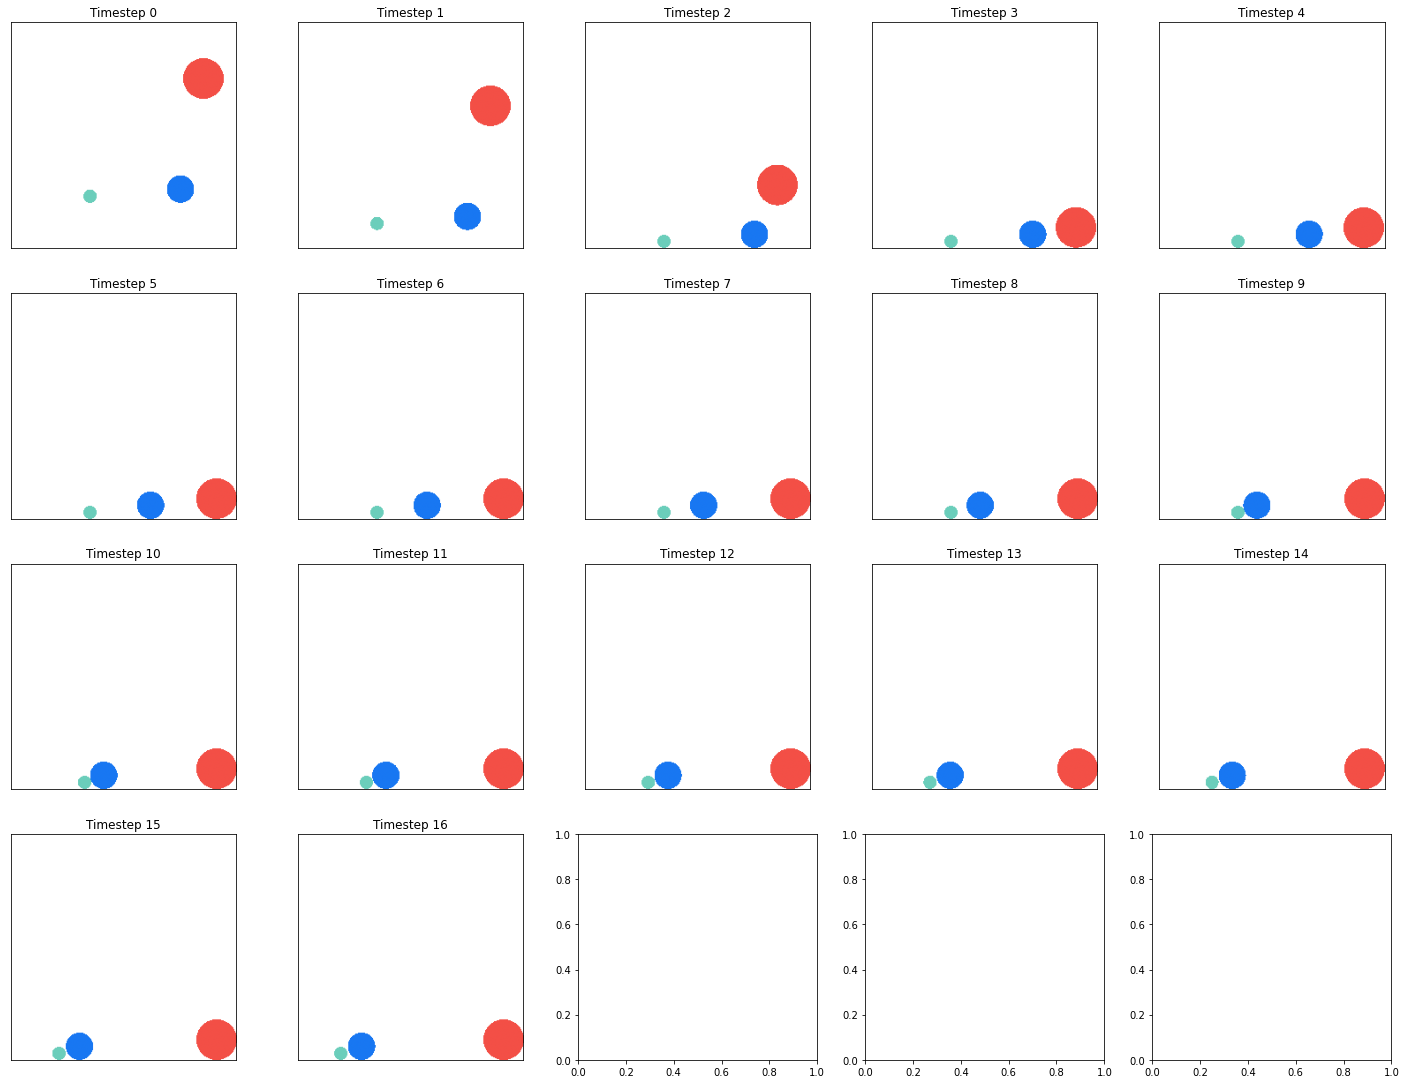

In [43]:
# Displaying the simulation
print('Number of observations returned by simulator:', len(simulation.images))

num_across = 5
height = int(math.ceil(len(simulation.images) / num_across))
fig, axs = plt.subplots(height, num_across, figsize=(20, 15))
fig.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# We can visualize the simulation at each timestep.
for i, (ax, image) in enumerate(zip(axs.flatten(), simulation.images)):
    # Convert the simulation observation to images.
    img = phyre.observations_to_float_rgb(image)
    ax.imshow(img)
    ax.title.set_text(f'Timestep {i}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

In [48]:
# We can also get the response from the simulator in a matrix form
featurized_objects = simulation.featurized_objects

# I am interested in saving coordinates and diameters for every object
# This is because I am limiting my model to work only with balls, so these features are enough
# The last component of the output corresponds to the red ball - the one we are interested in

# X-coordinates by frame
print('X-coordinates by frame')
print(featurized_objects.xs)
print()

# Y-coordinates by frame
print('Y-coordinates by frame')
print(featurized_objects.ys)
print()

# Diameters
print('Diameters')
print(featurized_objects.diameters)

X-coordinates by frame
[[0.35       0.75       0.8515625 ]
 [0.35       0.75       0.8515625 ]
 [0.35       0.75       0.8515625 ]
 [0.35       0.7114164  0.9026867 ]
 [0.35       0.66455984 0.90613115]
 [0.35       0.6178594  0.9095638 ]
 [0.35       0.5713145  0.9099611 ]
 [0.35       0.52492464 0.9099611 ]
 [0.35       0.4786895  0.9099611 ]
 [0.34893987 0.43316925 0.9099611 ]
 [0.3254996  0.41074294 0.9099611 ]
 [0.302667   0.3890298  0.9099611 ]
 [0.27991056 0.367389   0.9099611 ]
 [0.25722998 0.34582034 0.9099611 ]
 [0.23462513 0.3243235  0.9099611 ]
 [0.21209568 0.30289835 0.9099611 ]
 [0.18964136 0.28154457 0.9099611 ]]

Y-coordinates by frame
[[0.22923309 0.26048306 0.7499362 ]
 [0.10864712 0.1398971  0.62935024]
 [0.02942147 0.06066259 0.27907702]
 [0.02942147 0.06066405 0.09103707]
 [0.02942147 0.06066405 0.09000985]
 [0.02942147 0.06066405 0.09000985]
 [0.02942147 0.06066405 0.09000985]
 [0.02942147 0.06066405 0.09000985]
 [0.02942147 0.06066405 0.09000985]
 [0.02942147 0.0

# Data preparation

So my data preparation consists of the following steps:

1. Simulate a bunch of scenarios

2. For each scenario

    - Save diameters and positions of all objects on the first 3 frames <- this is input
    
    - Save position of the red ball on the following frame <- this is output
    
    - Move one frame further and repeat
    
I will start with saving positions and diameters of each ball on each frame. So the data that I save has the following dimensions: (n_frames, n_objects, 3), where 3 corresponds to (x, y, diameter). I will save the output in a separate file for each sinle simulation - thus, I will have n_tasks * n_valid_actions files.

I will then create a PyTorch dataset object that will load these data and yield it as a sequential data, providing three frames as input and position of the red ball on the following frame as an output.

In [57]:
# Trying for one simulation and one action

task_index = 0
action_index = 0
simulation = simulator.simulate_action(task_index, actions[action_index], need_images=True, need_featurized_objects=True)
featurized_objects = simulation.featurized_objects

data = []
for frame_number in range(len(featurized_objects.features)):
    features = []
    features.append(featurized_objects.xs[frame_number])
    features.append(featurized_objects.ys[frame_number])
    features.append(featurized_objects.diameters)
    features = np.array(features).T
    data.append(features)
np.save('data/test', data)
    

In [58]:
data

[array([[0.35      , 0.22923309, 0.05859375],
        [0.75      , 0.26048306, 0.12109375],
        [0.4140625 , 0.71478   , 0.015625  ]], dtype=float32),
 array([[0.35      , 0.10864712, 0.05859375],
        [0.75      , 0.1398971 , 0.12109375],
        [0.4140625 , 0.594194  , 0.015625  ]], dtype=float32),
 array([[0.35      , 0.02942147, 0.05859375],
        [0.75      , 0.06066259, 0.12109375],
        [0.4140625 , 0.24392076, 0.015625  ]], dtype=float32),
 array([[0.35      , 0.02942147, 0.05859375],
        [0.75      , 0.06066405, 0.12109375],
        [0.4140625 , 0.03623718, 0.015625  ]], dtype=float32),
 array([[0.35      , 0.02942147, 0.05859375],
        [0.75      , 0.06066405, 0.12109375],
        [0.4140625 , 0.00793899, 0.015625  ]], dtype=float32),
 array([[0.35      , 0.02942147, 0.05859375],
        [0.75      , 0.06066405, 0.12109375],
        [0.4140625 , 0.00793899, 0.015625  ]], dtype=float32),
 array([[0.35      , 0.02942147, 0.05859375],
        [0.75      , 0.0

In [61]:
# Trying for multiple actions within the same simulation
task_index = 0

for action_index in range(len(actions)):
    simulation = simulator.simulate_action(task_index, actions[action_index], need_images=True, need_featurized_objects=True)
    
    # if action was invalid, don't solve and continue to next
    if simulation.status.is_invalid(): continue
        
    featurized_objects = simulation.featurized_objects
    
    data = []
    for frame_number in range(len(featurized_objects.features)):
        features = []
        features.append(featurized_objects.xs[frame_number])
        features.append(featurized_objects.ys[frame_number])
        features.append(featurized_objects.diameters)
        features = np.array(features).T
        data.append(features)
        
    np.save(f'data/action-{action_index}', data)

In [93]:
# Trying for multiple simulations with multiple actions
# I noticed that 90% of all simulations have 17 frames, so I'll only leave those
# to simplify my dataset generation for PyTorch
for task_index in range(len(tasks)):
    for action_index in range(len(actions)):
        simulation = simulator.simulate_action(task_index, actions[action_index], need_images=True, need_featurized_objects=True)

        # if action was invalid, don't solve and continue to next
        if simulation.status.is_invalid(): continue

        featurized_objects = simulation.featurized_objects

        data = []
        for frame_number in range(len(featurized_objects.features)):
            features = []
            features.append(featurized_objects.xs[frame_number])
            features.append(featurized_objects.ys[frame_number])
            features.append(featurized_objects.diameters)
            features = np.array(features).T
            data.append(features)
        
        if len(data) != 17: continue
            
        np.save(f'data/task-{task_index}-action-{action_index}', data)

In [103]:
np.load('data/task-0-action-0.npy')

array([[[0.35      , 0.22923309, 0.05859375],
        [0.75      , 0.26048306, 0.12109375],
        [0.4140625 , 0.71478   , 0.015625  ]],

       [[0.35      , 0.10864712, 0.05859375],
        [0.75      , 0.1398971 , 0.12109375],
        [0.4140625 , 0.594194  , 0.015625  ]],

       [[0.35      , 0.02942147, 0.05859375],
        [0.75      , 0.06066259, 0.12109375],
        [0.4140625 , 0.24392076, 0.015625  ]],

       [[0.35      , 0.02942147, 0.05859375],
        [0.75      , 0.06066405, 0.12109375],
        [0.4140625 , 0.03623718, 0.015625  ]],

       [[0.35      , 0.02942147, 0.05859375],
        [0.75      , 0.06066405, 0.12109375],
        [0.4140625 , 0.00793899, 0.015625  ]],

       [[0.35      , 0.02942147, 0.05859375],
        [0.75      , 0.06066405, 0.12109375],
        [0.4140625 , 0.00793899, 0.015625  ]],

       [[0.35      , 0.02942147, 0.05859375],
        [0.75      , 0.06066405, 0.12109375],
        [0.4140625 , 0.00793899, 0.015625  ]],

       [[0.35      ,